In [75]:
#project for Supervised Learning
%matplotlib inline 
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.metrics import classification_report,confusion_matrix

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [79]:
df_bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df_bank.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [80]:
#Studing the distribution of each column
df_bank.describe()

# Study the data distribution in each attribute, share your findings. 

# From the below distribution, we find that for most of the columns, 
# the Mean and Median are close to each other in values. This means that there are not many outliers.

# For the Mortgage column, the mean and median are way different, this could be explained may be by 
# fact that the median Value customer doesn't have Mortgage however the Mean of the Mortgage column is 56.49
# Thats why the Standard Deviation of Mortgage column is high

# We could ignore the distribution of ID and ZIP Code columns as the data there is not actually numeric.

# Experience has Negative Values, Replace them with Zero



,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [58]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [81]:
df_bank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [82]:
df_bank[df_bank.isnull().any(axis=1)]

# No Null Values found

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [85]:
# Replaced the Negative values in dataframe, in 'Experience' column in this case with 0's
df_bank[df_bank < 0] = 0
df_bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [86]:
df_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


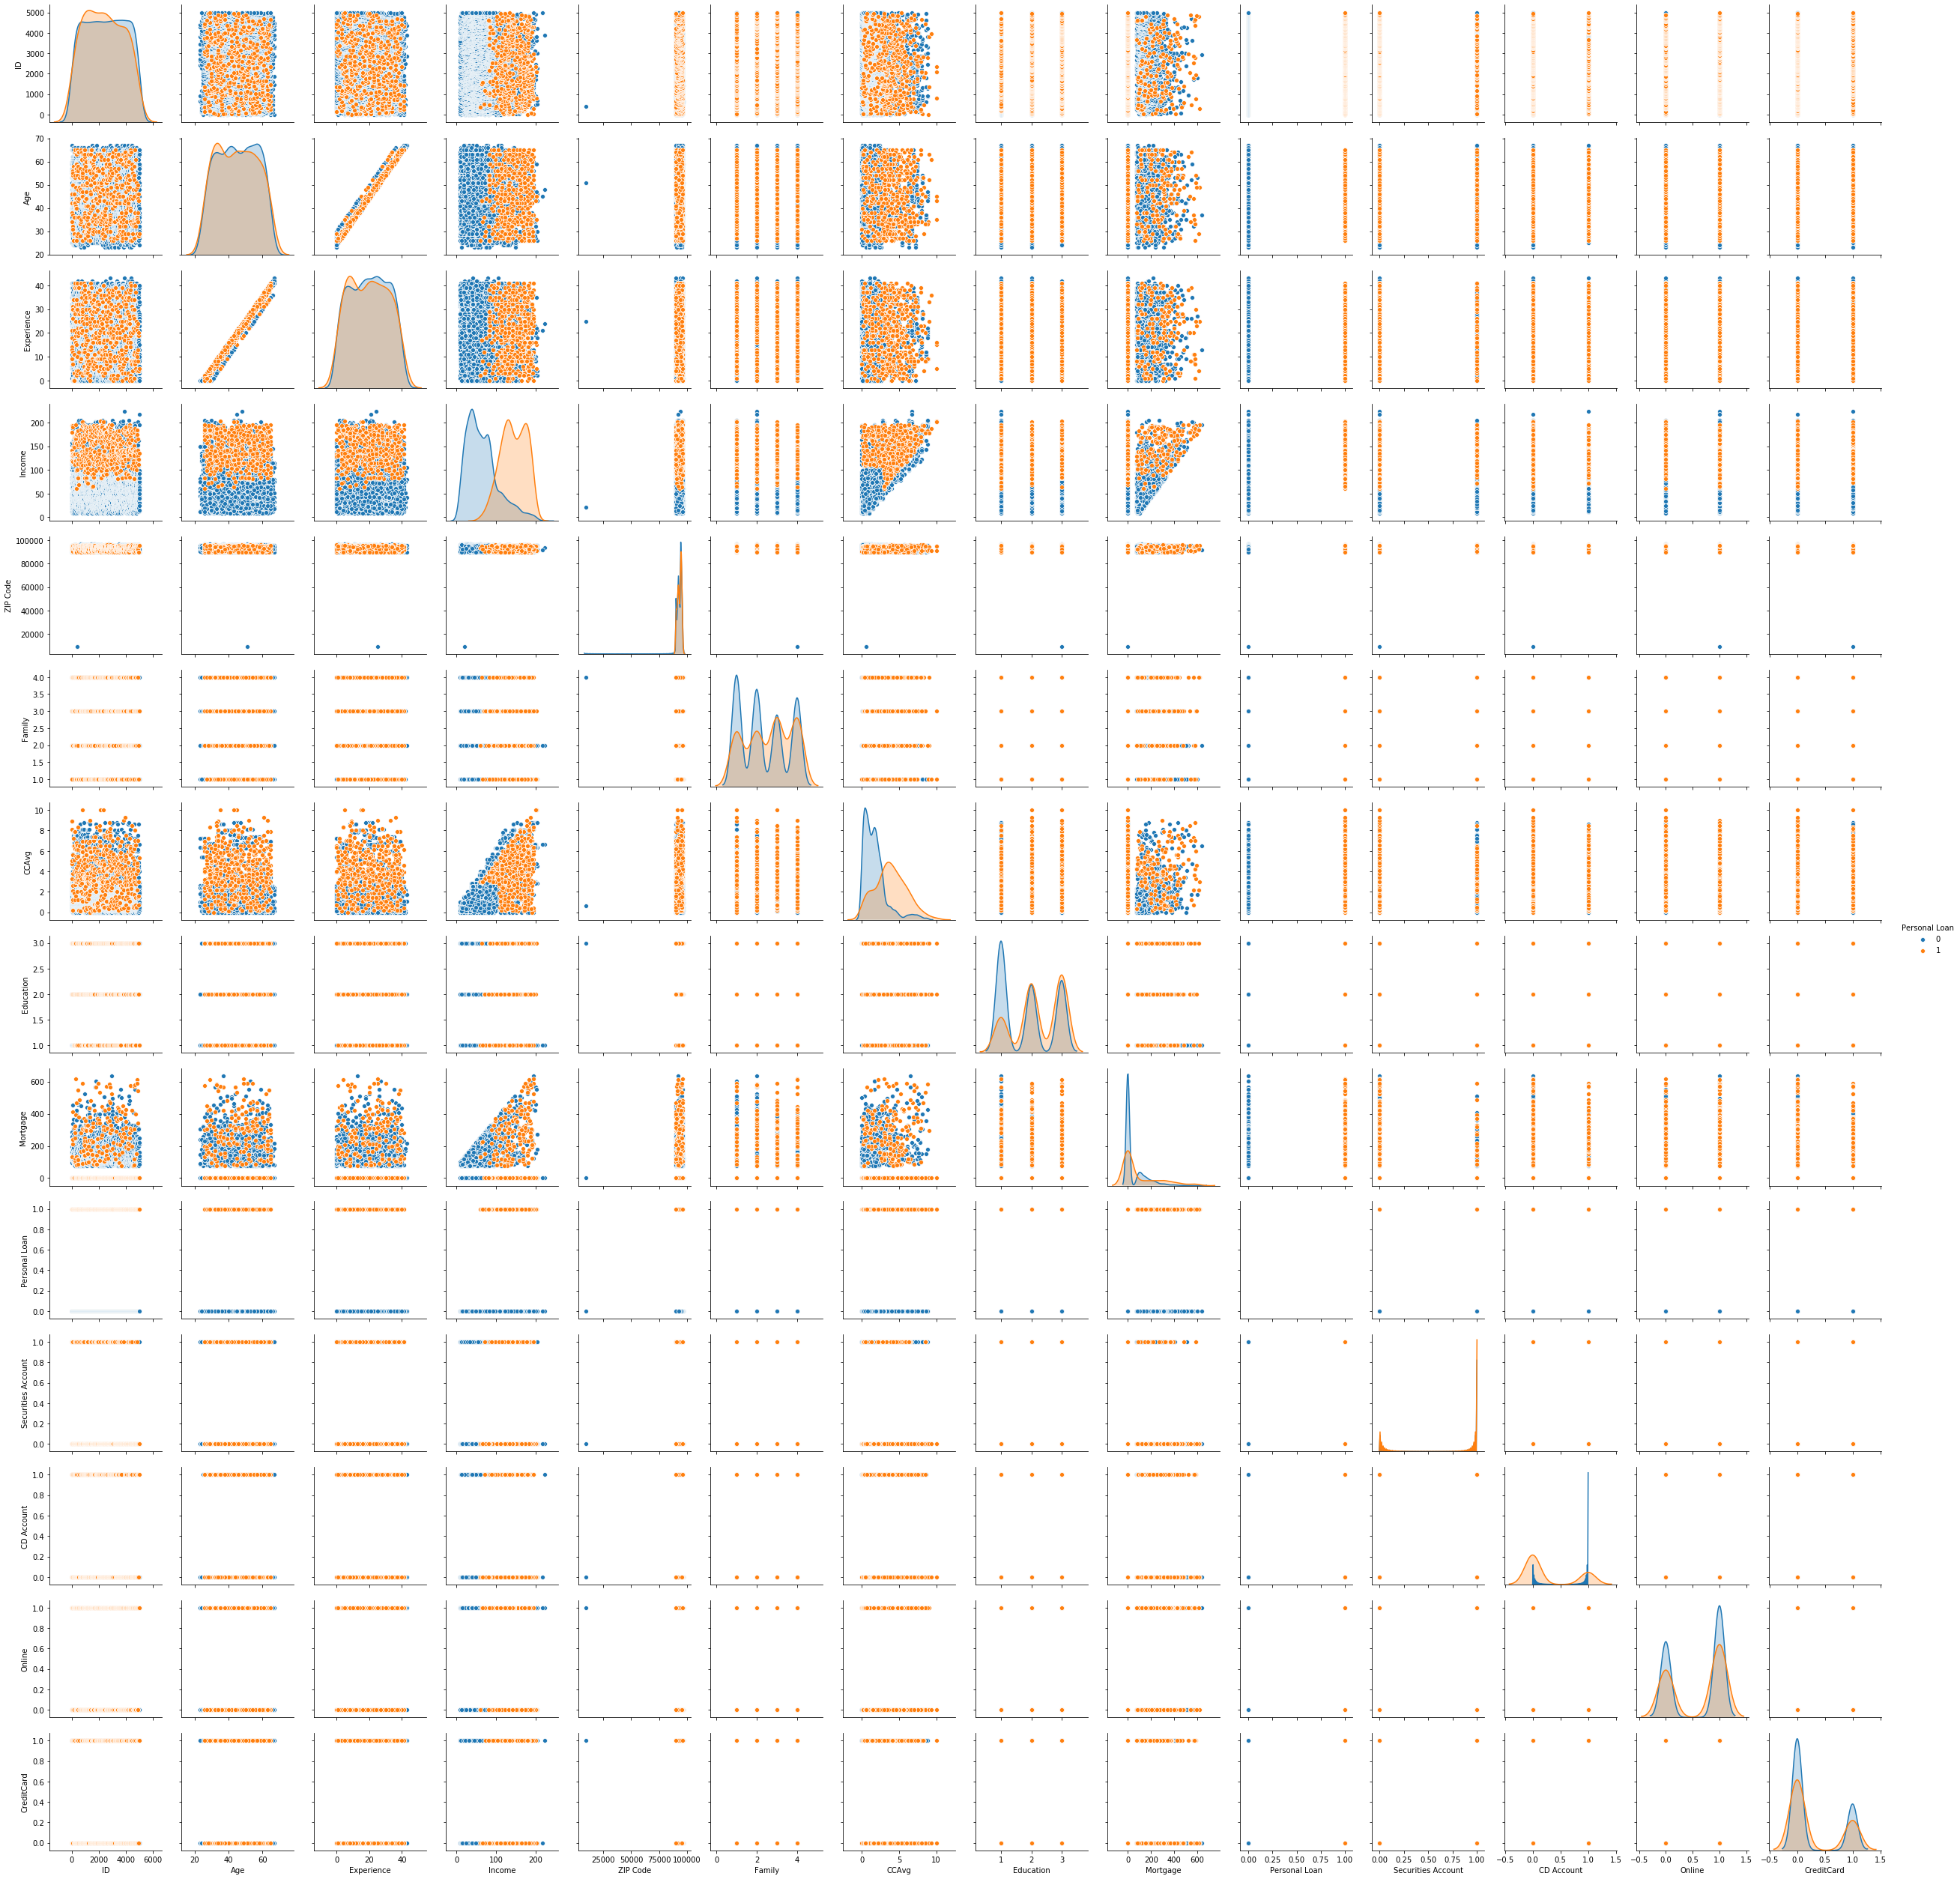

In [87]:
#the data distribution in each attribute
sns.pairplot(df_bank, hue='Personal Loan')

# Looking at the following Pairplots, we can see that:
# As the age of the customer increases, the customer tends to go for the loans
# The High Income customers are not likely to go for loans


In [88]:
# Get the target column distribution
# "Personal Loan" in the dataset would be considered as the Target distribution
# Dropping Zip Code column as well. As it doesn't have any significance since Zip Code are just Random series of numbers
# Copy all the pridictor variables into X dataframe
X = df_bank.drop(['Personal Loan', 'ZIP Code'], axis=1)

# copy the 'Personal Loan' column alone into the y dataframe (Target column)
y = df_bank[['Personal Loan']]

print(X)
print(y)

        ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0        1   25           1      49       4    1.6          1         0   
1        2   45          19      34       3    1.5          1         0   
2        3   39          15      11       1    1.0          1         0   
3        4   35           9     100       1    2.7          2         0   
4        5   35           8      45       4    1.0          2         0   
...    ...  ...         ...     ...     ...    ...        ...       ...   
4995  4996   29           3      40       1    1.9          3         0   
4996  4997   30           4      15       4    0.4          1        85   
4997  4998   63          39      24       2    0.3          3         0   
4998  4999   65          40      49       3    0.5          2         0   
4999  5000   28           4      83       3    0.8          1         0   

      Securities Account  CD Account  Online  CreditCard  
0                      1           0    

In [89]:
# Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [90]:
# Logistic Classification Model

model = LogisticRegression()
model.fit(X_train, y_train)
model_score_TrainingSet = model.score(X_train, y_train)
print("The accuracy on Training set is ")
print(model_score_TrainingSet)
print("\n")

y_predict = model.predict(X_test)
model_score_TestSet = model.score(X_test, y_test)
print("The accuracy on Test set is ")
print(model_score_TestSet)
print("\n")

print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))



The accuracy on Training set is 
0.9511428571428572


The accuracy on Test set is 
0.946


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.79      0.62      0.69       149

    accuracy                           0.95      1500
   macro avg       0.88      0.80      0.83      1500
weighted avg       0.94      0.95      0.94      1500

[[1327   24]
 [  57   92]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()



In [102]:
# To find the most Optimum Value of K from range of Values [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

neighbors = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    print("The Accuracy of train_accuracy_plot for value of k = %s is : %s" %(k, train_accuracy_plot[i]))
    print("The Accuracy of test_accuracy_plot for value of k = %s is : %s" %(k, test_accuracy_plot[i]))
    print("\n")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 1 is : 1.0
The Accuracy of test_accuracy_plot for value of k = 1 is : 0.9496666666666667




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 3 is : 0.9745857142857142
The Accuracy of test_accuracy_plot for value of k = 3 is : 0.9536999999999999




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 5 is : 0.9657000000000002
The Accuracy of test_accuracy_plot for value of k = 5 is : 0.9526666666666666




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 7 is : 0.9603999999999999
The Accuracy of test_accuracy_plot for value of k = 7 is : 0.9500666666666667




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 9 is : 0.9563142857142857
The Accuracy of test_accuracy_plot for value of k = 9 is : 0.9494333333333334




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 11 is : 0.9541714285714284
The Accuracy of test_accuracy_plot for value of k = 11 is : 0.9482666666666667




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 13 is : 0.9521000000000001
The Accuracy of test_accuracy_plot for value of k = 13 is : 0.9476666666666664




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 15 is : 0.9502428571428572
The Accuracy of test_accuracy_plot for value of k = 15 is : 0.9456333333333335




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 17 is : 0.9488428571428571
The Accuracy of test_accuracy_plot for value of k = 17 is : 0.9439333333333334




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new

The Accuracy of train_accuracy_plot for value of k = 19 is : 0.9465428571428574
The Accuracy of test_accuracy_plot for value of k = 19 is : 0.9429666666666666




In [104]:
# The optimum Value of K is 3 from the above output.

'''
The Accuracy of train_accuracy_plot for value of k = 1 is : 1.0
The Accuracy of test_accuracy_plot for value of k = 1 is : 0.9496666666666667


The Accuracy of train_accuracy_plot for value of k = 3 is : 0.9745857142857142
The Accuracy of test_accuracy_plot for value of k = 3 is : 0.9536999999999999


The Accuracy of train_accuracy_plot for value of k = 5 is : 0.9657000000000002
The Accuracy of test_accuracy_plot for value of k = 5 is : 0.9526666666666666


The Accuracy of train_accuracy_plot for value of k = 7 is : 0.9603999999999999
The Accuracy of test_accuracy_plot for value of k = 7 is : 0.9500666666666667


The Accuracy of train_accuracy_plot for value of k = 9 is : 0.9563142857142857
The Accuracy of test_accuracy_plot for value of k = 9 is : 0.9494333333333334


The Accuracy of train_accuracy_plot for value of k = 11 is : 0.9541714285714284
The Accuracy of test_accuracy_plot for value of k = 11 is : 0.9482666666666667


The Accuracy of train_accuracy_plot for value of k = 13 is : 0.9521000000000001
The Accuracy of test_accuracy_plot for value of k = 13 is : 0.9476666666666664

The Accuracy of train_accuracy_plot for value of k = 15 is : 0.9502428571428572
The Accuracy of test_accuracy_plot for value of k = 15 is : 0.9456333333333335


The Accuracy of train_accuracy_plot for value of k = 17 is : 0.9488428571428571
The Accuracy of test_accuracy_plot for value of k = 17 is : 0.9439333333333334

The Accuracy of train_accuracy_plot for value of k = 19 is : 0.9465428571428574
The Accuracy of test_accuracy_plot for value of k = 19 is : 0.9429666666666666

'''

The Accuracy of train_accuracy_plot for value of k = 1 is : 1.0
The Accuracy of test_accuracy_plot for value of k = 1 is : 0.9496666666666667


The Accuracy of train_accuracy_plot for value of k = 3 is : 0.9745857142857142
The Accuracy of test_accuracy_plot for value of k = 3 is : 0.9536999999999999


The Accuracy of train_accuracy_plot for value of k = 5 is : 0.9657000000000002
The Accuracy of test_accuracy_plot for value of k = 5 is : 0.9526666666666666


The Accuracy of train_accuracy_plot for value of k = 7 is : 0.9603999999999999
The Accuracy of test_accuracy_plot for value of k = 7 is : 0.9500666666666667


The Accuracy of train_accuracy_plot for value of k = 9 is : 0.9563142857142857
The Accuracy of test_accuracy_plot for value of k = 9 is : 0.9494333333333334


The Accuracy of train_accuracy_plot for value of k = 11 is : 0.9541714285714284
The Accuracy of test_accuracy_plot for value of k = 11 is : 0.9482666666666667


The Accuracy of train_accuracy_plot for value of k = 13 is 

In [105]:
# The optimum Value of K is 3.
'''
The Accuracy of train_accuracy_plot for value of k = 3 is : 0.9745857142857142
The Accuracy of test_accuracy_plot for value of k = 3 is : 0.9536999999999999
'''

In [106]:
# Plot accuracy score vs k (with k value on X-axis) using matplotlib.
neighbors = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    # train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    #print("The Accuracy of train_accuracy_plot for value of k = %s is : %s" %(k, train_accuracy_plot[i]))
    print("The Accuracy of test_accuracy_plot for value of k = %s is : %s" %(k, test_accuracy_plot[i]))
    print("\n")


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 1 is : 0.9496666666666667




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 3 is : 0.9536999999999999




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 5 is : 0.9526666666666666




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 7 is : 0.9500666666666667




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 9 is : 0.9494333333333334




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 11 is : 0.9482666666666667




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 13 is : 0.9476666666666664




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 15 is : 0.9456333333333335




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 17 is : 0.9439333333333334




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

The Accuracy of test_accuracy_plot for value of k = 19 is : 0.9429666666666666




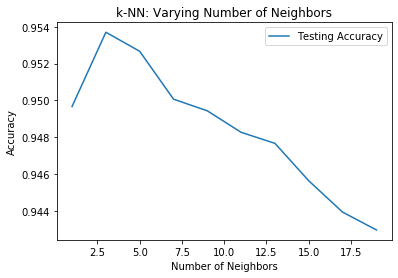

In [107]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [109]:
# Creating confusion matrix for K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaledX_train,y_train)
predi = knn.predict(scaledX_test)
print(confusion_matrix(y_test, predi))

[[1339    9]
 [  67   85]]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
# Naïve Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
model = GaussianNB()
model.fit(X_train, y_train)
# make predictions
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1348
           1       0.43      0.59      0.50       152

    accuracy                           0.88      1500
   macro avg       0.69      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1231  117]
 [  63   89]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Precision: Within a given set of positively-labeled results, the fraction that were true positives = tp/(tp + fp) 

Recall: Given a set of positively-labeled results, the fraction of all positives that were retrieved = tp/(tp + fn) 
    
Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
Accuracy is 80+2 / 100 i.e. 82%

To over come the dominance of the majority class, use weighted measure 

F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R) When B is set to 1 we get F1 = 2PR / (P+R)


In [111]:
1233/(1233+117)

0.9133333333333333

In [112]:
1233/(1233+63)

0.9513888888888888

In [113]:
89/(63+89)

0.5855263157894737

In [114]:
89/(89+117)

0.4320388349514563

In [116]:
# Give your reasoning on which is the best model in this case and why it performs better
# as the Train and Test accuracy is around 97 and 95 % respectively. As seen the the plot above, 
# the Accuracy was the highest at K value close to 3

'''
K-NN model with K value of 3 performs better when compared to Logical Regression/Classification and Naive Bayes Models.

The Accuracy of train_accuracy_plot for value of k = 3 is : 0.9745857142857142
The Accuracy of test_accuracy_plot for value of k = 3 is : 0.9536999999999999
'''

'\nK-NN model with K value of 3 performs better when compared to Logical Regression/Classification and Naive Bayes Models.\n\nThe Accuracy of train_accuracy_plot for value of k = 3 is : 0.9745857142857142\nThe Accuracy of test_accuracy_plot for value of k = 3 is : 0.9536999999999999\n'